**HOMEWORK 2** 

**Niccolò Zoboli VR 508441**

# **EXERCISE 1**

1. Load the thermal image `'FLIR_00021.jpeg'`.
2. Assume that the temperature corresponds to `0.1 * pixel value`.
3. Display the image using a diverging colormap centered at **12°C**, mapping the colormap in the range **4°C to 20°C**.
4. Add contour lines corresponding to **4°C, 8°C, 12°C, 16°C, and 20°C**.

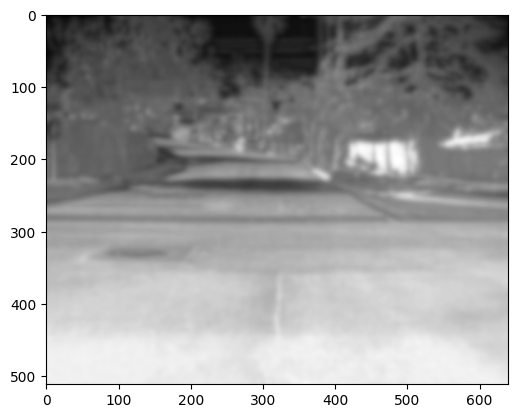

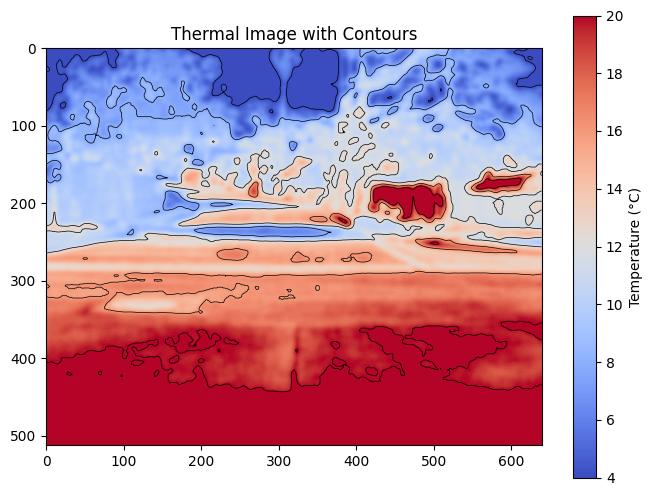

In [269]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from matplotlib.colors import Normalize
import plotly.express as px



image_path = 'FLIR_00021.jpeg'
image = Image.open(image_path).convert('L')  # Convert to grayscale
image_data = np.array(image) * 0.1  #point 2: convert pixel values to temperature
plt.imshow(image, cmap = plt.cm.gray)

#plot with diverging colormap

plt.figure(figsize=(8, 6))
cmap = plt.cm.coolwarm
img_plot = plt.imshow(image_data, cmap=cmap, vmin=4, vmax=20)
plt.colorbar(img_plot, label='Temperature (°C)')
contour_levels = [4, 8, 12, 16, 20]     #point 4 countours
plt.contour(image_data, levels=contour_levels, colors='black', linewidths=0.5)
plt.title('Thermal Image with Contours')
plt.show()



# **EXERCISE 2**

1. The file `limits_IT_province.geojson` includes the contours of all the Italian administrative districts called "province".
2. The file `polveri.csv` contains data about pollution measured by different sensors in the province of Veneto (the region including Verona) over different years (number of days in which the value of fine dust exceeded the limit).

## **Task**

- Compute the average values measured by the different sensors for each "provincia" in **2022** and **2012**.
- Create a **choropleth map** where each "provincia" is represented with a categorical color.


In [270]:
pollution_path = pd.read_csv("polveri.csv")
geo_path ="limits_IT_provinces.geojson"


- Compute the average values measured by the different sensors for each "provincia" in **2022** and **2012**.

In [271]:
#avarage for provincia 2022
avg_2022 = pollution_path.groupby('Provincia')['2022'].mean().reset_index()
avg_2022.columns = ['Provincia', 'Avg_2022']


#avarage for provincia 2012
avg_2012 = pollution_path.groupby('Provincia')['2012'].mean().reset_index()
avg_2012.columns = ['Provincia', 'Avg_2012']



# Merging
avg_value = pd.merge(avg_2012, avg_2022, on='Provincia')

avg_value

,Provincia,Avg_2012,Avg_2022
0,Belluno,19.500000,15.000000
1,Padova,29.666667,21.200000
2,Rovigo,22.000000,23.000000
3,Treviso,26.000000,18.000000
4,Venezia,30.000000,21.333333
5,Verona,24.000000,18.000000
6,Vicenza,24.500000,19.750000


- Create a **choropleth map** where each "provincia" is represented with a categorical color.

In [272]:
import json
province = "limits_IT_provinces.geojson"
fig = px.choropleth(data_frame = avg_values,
                    geojson=province, 
                    locations='Provincia',
                    featureidkey="properties.prov_name",
                    color='Provincia',
                    scope="europe",
                    )

fig.update_geos(showcountries=False, showcoastlines=False, showland=False, fitbounds="locations")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

## Problem ! 

A categorical map highlights distinctions between areas, while a quantitative map represents numerical data and patterns. Combining both approaches allows for clearer visualization and deeper analysis, basically it's not correct to merge it because we risk to lose some important information. That's why I create two distinct quantitative maps one for 2022 and one for 2012

In [273]:
pollution_data = pd.read_csv("polveri.csv")

pollution_data['Mean_2012'] = pollution_data.groupby('Provincia')['2012'].transform('mean')
pollution_data['Mean_2022'] = pollution_data.groupby('Provincia')['2022'].transform('mean')

geo_data_path = "limits_IT_provinces.geojson"

map_fig = px.choropleth(
    data_frame = pollution_data,
    geojson = geo_data_path,
    locations = 'Provincia',
    featureidkey = 'properties.prov_name',
    color = 'Mean_2022',
    color_continuous_scale = px.colors.sequential.Cividis,
    scope = 'europe',
    hover_data ={
        'Provincia': True,
        'Mean_2022': True,
        'Mean_2012': True
    }
)

map_fig.update_geos(
    showcountries=True,
    countrycolor='gray',
    showcoastlines=False,
    showland=False,
    fitbounds='locations'
)

map_fig.update_layout(
    title={
        'text': 'Average Pollution Levels by Province (2022)',
        'x': 0.5,
        'xanchor': 'center',
        'font': {'size': 18, 'weight': 'bold'}
    },
    autosize=True,
    margin={'r': 0, 't': 50, 'l': 0, 'b': 0},
    coloraxis_colorbar={
        'title': 'Average (2022)',
        'tickformat': ".1f"
    },
    template='simple_white',
)

map_fig.show()

In [274]:
#2012 


fig = px.choropleth(
    data_frame=pollution_data,
    geojson=geo_data_path,
    locations='Provincia',
    featureidkey='properties.prov_name',
    color='Mean_2012',
    color_continuous_scale=px.colors.sequential.Cividis,
    scope='europe',
    hover_data={'Provincia': True, 'Mean_2022': True, 'Mean_2012': True}
)

fig.update_geos(
    showcountries=True,
    countrycolor='gray',
    showcoastlines=False,
    showland=False,
    fitbounds='locations'
)

fig.update_layout(
    title={
        'text': 'Average Pollution Levels by Province (2012)',
        'x': 0.5,
        'xanchor': 'center',
        'font': {'size': 20, 'weight': 'bold'}
    },
    autosize=True,
    margin={'r': 0, 't': 50, 'l': 0, 'b': 0},
    coloraxis_colorbar={
        'title': 'Average (2012)',
        'tickformat': ".1f"
    },
    template='simple_white',
)

fig.show()


- Add a **symbol map** (`scattered_geo`) with:
  - **Dot size** representing the average number of days over limits in **2022**.
  - **Dot color** indicating the increase/decrease with respect to **2012** (use an optimal colormap to highlight improvements and deteriorations).

In [275]:
# Calculate the difference between 2022 and 2012
avg_values['Difference'] = avg_values['Avg_2022'] - avg_values['Avg_2012']
avg_values

,Provincia,Avg_2022,Avg_2012,Difference
0,Belluno,15.000000,19.500000,-4.500000
1,Padova,21.200000,29.666667,-8.466667
2,Rovigo,23.000000,22.000000,1.000000
3,Treviso,18.000000,26.000000,-8.000000
4,Venezia,21.333333,30.000000,-8.666667
5,Verona,18.000000,24.000000,-6.000000
6,Vicenza,19.750000,24.500000,-4.750000


In [276]:
fig_choropleth = px.choropleth(data_frame=avg_values,
                               geojson=province,
                               locations='Provincia',
                               featureidkey="properties.prov_name",
                               color='Provincia'
                               )

fig_choropleth.update_geos(showcountries=False, showcoastlines=False, showland=False, fitbounds="locations")
fig_choropleth.update_layout(margin={"r":0,"t":0,"l":0,"b":0})

fig_scatter_geo = px.scatter_geo(avg_values,
                                 geojson=province,
                                 locations='Provincia',
                                 featureidkey="properties.prov_name",
                                 size='Avg_2022',
                                 color='Difference',
                                 color_continuous_scale=px.colors.diverging.RdBu,
                                 size_max=12,
                                 projection="mercator"
                                 )

fig_choropleth.update_layout(coloraxis_colorbar=dict(thickness=25, len=0.5, yanchor='bottom', y=0.05),coloraxis_colorbar_title='Difference')
fig_choropleth.add_trace(fig_scatter_geo.data[0])
for i, frame in enumerate(fig_choropleth.frames):
    fig_choropleth.frames[i].data += (fig_scatter_geo.frames[i].data[0],)
fig_choropleth.show()